In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family = "Malgun Gothic")

from IPython.core.display import display, HTML

# 글씨가 뭉게져서 보이는 것 같으면 아래의 설정을 통해서 개선할 수 있음
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/gdrive/')

In [2]:
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "150%"),
    ("color", 'darkgreen')])]

In [3]:
# "Korea"라는 문자를 포함하는 모든 train데이터 레코드들 추출
train = pd.read_csv('data/train.csv')
train_korea = train[train["Country/Region"].str.contains("Korea")]
output = ''
output += train_korea.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"train_korea : {train_korea.shape}").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))

# "Korea"라는 문자를 포함하는 모든 test데이터 레코드들 추출
test = pd.read_csv('data/test.csv')
test_korea = test[test["Country/Region"].str.contains("Korea")]
# output = ''
# output += test_korea.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"test_korea : {test_korea.shape}").set_table_styles(styles)._repr_html_()
# output += "\xa0\xa0\xa0"
# display(HTML(output))

# submission data 불러오기
submission = pd.read_csv('data/submission.csv')
# output = ''
# output += submission.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"submission : {submission.shape}").set_table_styles(styles)._repr_html_()
# output += "\xa0\xa0\xa0"
# display(HTML(output))

# time 데이터에서 test값을 가져오기
time= pd.read_csv('../Corona19/coronavirusdataset_v2.0/Time.csv').iloc[:,:7]
output = ''
output += time.head(3).style.set_table_attributes("style='display:inline'").set_caption(f"time : {time.shape}").set_table_styles(styles)._repr_html_()
output += "\xa0\xa0\xa0"
display(HTML(output))



,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
8260,13021,nan,"Korea, South",36,128,2020-01-22,1,0
8261,13022,nan,"Korea, South",36,128,2020-01-23,1,0
8262,13023,nan,"Korea, South",36,128,2020-01-24,2,0


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


### 데이터별 날짜
- train_korea --> 1-22 ~ 3-20
- Time --> 1-20 ~ 3-22

In [4]:
# 다음 셀을 여러번 반복해도 에러나게 하지 않으려 설정
df1 = train_korea.copy()
df2 = time.copy()

In [11]:
train_korea = df1.set_index("Date")
time = df2.set_index("date")

# 위의 train_korea와 time데이터를 합침(같은 날짜끼리 합쳐지도록 위에서 설정함)
train_korea = pd.concat([time, train_korea], axis=1, sort=False)
train_korea.rename(columns={'test':'examination'}, inplace=True)  # test컬럼이 test데이터프레임과 헷갈릴 소지가 있어 바꿈
train_korea["Country/Region"].fillna("Korea, South", inplace=True)
train_korea

,time,examination,negative,confirmed,released,deceased,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities
2020-01-20,16,1,0,1,0,0,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN
2020-01-21,16,1,0,1,0,0,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN
2020-01-22,16,4,3,1,0,0,13021.0,NaN,"Korea, South",36.0,128.0,1.0,0.0
2020-01-23,16,22,21,1,0,0,13022.0,NaN,"Korea, South",36.0,128.0,1.0,0.0
2020-01-24,16,27,25,2,0,0,13023.0,NaN,"Korea, South",36.0,128.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,0,295647,270888,8413,1540,84,13077.0,NaN,"Korea, South",36.0,128.0,8413.0,84.0
2020-03-19,0,307024,282555,8565,1947,91,13078.0,NaN,"Korea, South",36.0,128.0,8565.0,91.0
2020-03-20,0,316664,292487,8652,2233,94,13079.0,NaN,"Korea, South",36.0,128.0,8652.0,94.0
2020-03-21,0,327509,303006,8799,2612,102,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN


In [12]:
# 여긴 데이터프레임 보기 이쁘게 바꾸는 작업
# 이 셀은 여러번 실행 X, 처음부터 다시 하고 싶으면 위의 셀부터 다시 run할 것!

# column의 순서 바꾸기
train_korea = train_korea[list(train_korea.columns[6:]) + list(train_korea.columns[:6])]

# firm_examination_rate 컬럼 새로 만들기
train_korea["firm_examination_rate"] = train_korea["confirmed"] * 100 / train_korea["examination"]
train_korea.reset_index(inplace=True)
train_korea.rename(columns={'index':'date'}, inplace=True)
train_korea


,date,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,time,examination,negative,confirmed,released,deceased,firm_examination_rate
0,2020-01-20,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN,16,1,0,1,0,0,100.000000
1,2020-01-21,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN,16,1,0,1,0,0,100.000000
2,2020-01-22,13021.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16,4,3,1,0,0,25.000000
3,2020-01-23,13022.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16,22,21,1,0,0,4.545455
4,2020-01-24,13023.0,NaN,"Korea, South",36.0,128.0,2.0,0.0,16,27,25,2,0,0,7.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-03-18,13077.0,NaN,"Korea, South",36.0,128.0,8413.0,84.0,0,295647,270888,8413,1540,84,2.845623
59,2020-03-19,13078.0,NaN,"Korea, South",36.0,128.0,8565.0,91.0,0,307024,282555,8565,1947,91,2.789684
60,2020-03-20,13079.0,NaN,"Korea, South",36.0,128.0,8652.0,94.0,0,316664,292487,8652,2233,94,2.732234
61,2020-03-21,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN,0,327509,303006,8799,2612,102,2.686644


In [15]:
train_korea.reset_index(inplace=True)
train_korea.rename(columns={"index":"rowno"}, inplace=True)
train_korea["rowno"] +=1
train_korea

,rowno,date,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,time,examination,negative,confirmed,released,deceased,firm_examination_rate
0,1,2020-01-20,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN,16,1,0,1,0,0,100.000000
1,2,2020-01-21,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN,16,1,0,1,0,0,100.000000
2,3,2020-01-22,13021.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16,4,3,1,0,0,25.000000
3,4,2020-01-23,13022.0,NaN,"Korea, South",36.0,128.0,1.0,0.0,16,22,21,1,0,0,4.545455
4,5,2020-01-24,13023.0,NaN,"Korea, South",36.0,128.0,2.0,0.0,16,27,25,2,0,0,7.407407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,2020-03-18,13077.0,NaN,"Korea, South",36.0,128.0,8413.0,84.0,0,295647,270888,8413,1540,84,2.845623
59,60,2020-03-19,13078.0,NaN,"Korea, South",36.0,128.0,8565.0,91.0,0,307024,282555,8565,1947,91,2.789684
60,61,2020-03-20,13079.0,NaN,"Korea, South",36.0,128.0,8652.0,94.0,0,316664,292487,8652,2233,94,2.732234
61,62,2020-03-21,NaN,NaN,"Korea, South",NaN,NaN,NaN,NaN,0,327509,303006,8799,2612,102,2.686644


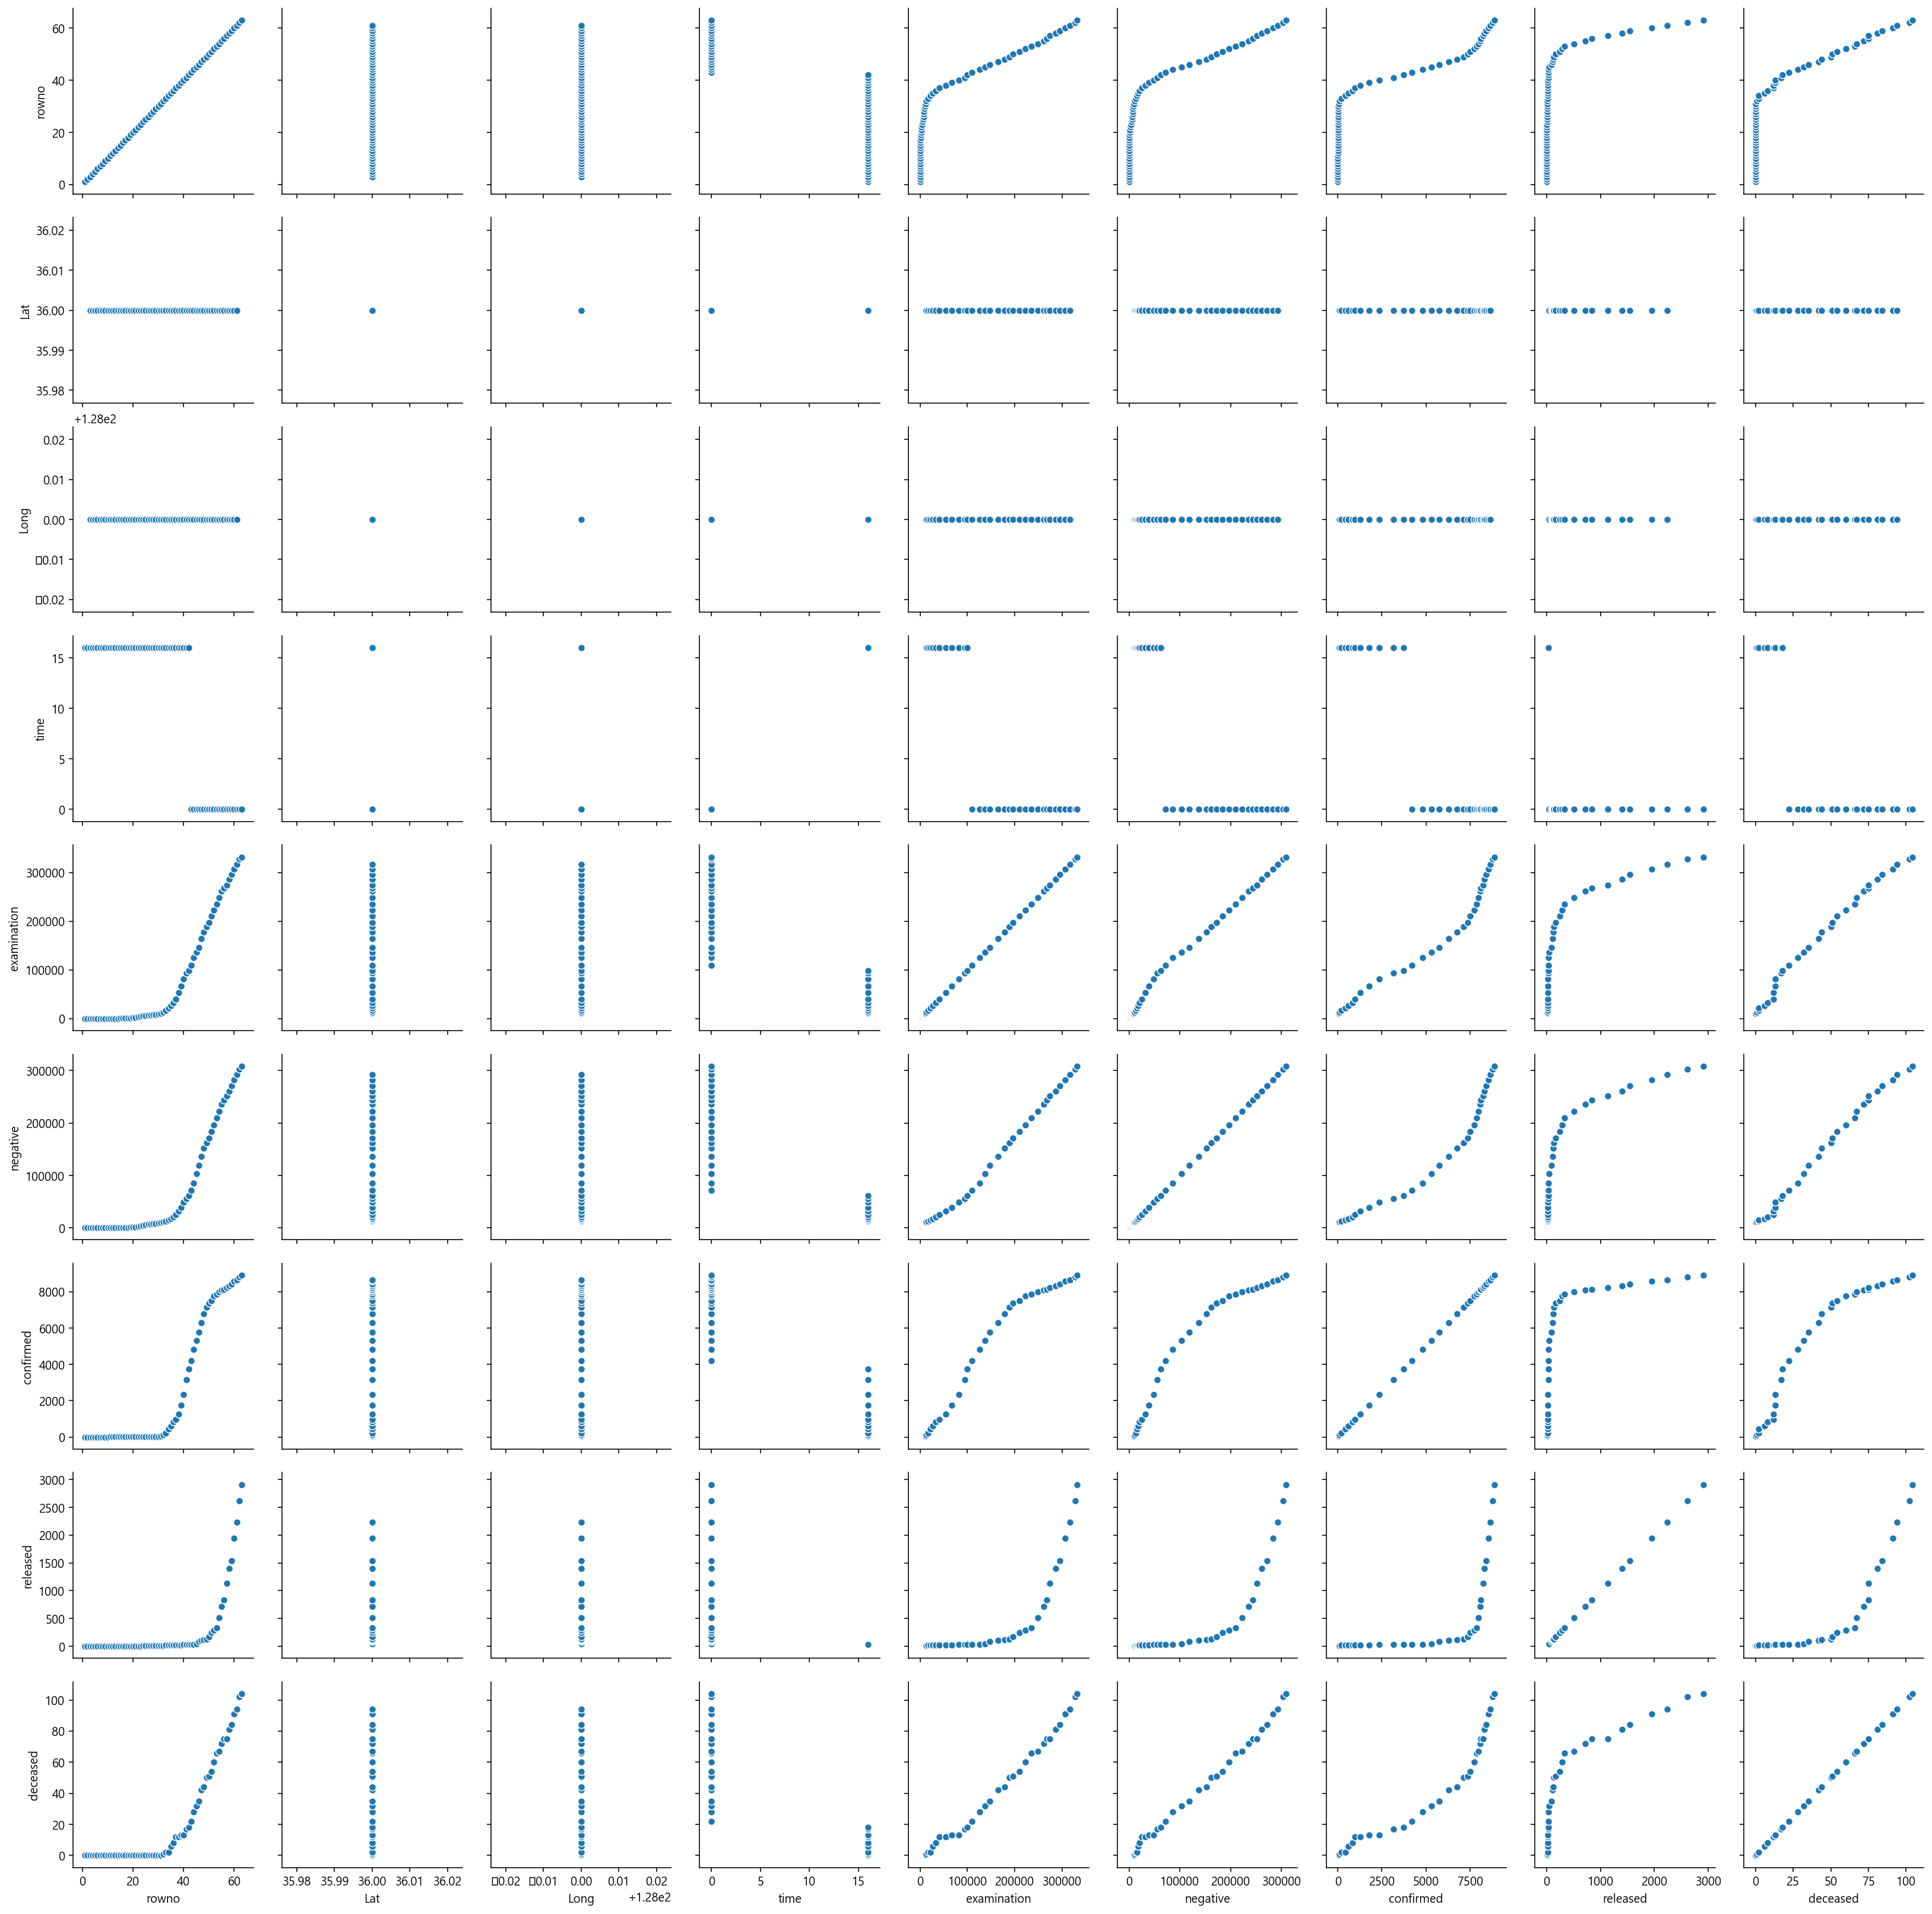

In [16]:
sns.pairplot(train_korea[["rowno", "Lat", "Long", "time", "examination", 'negative', 'confirmed', 'released', 'deceased']], diag_kind=None)

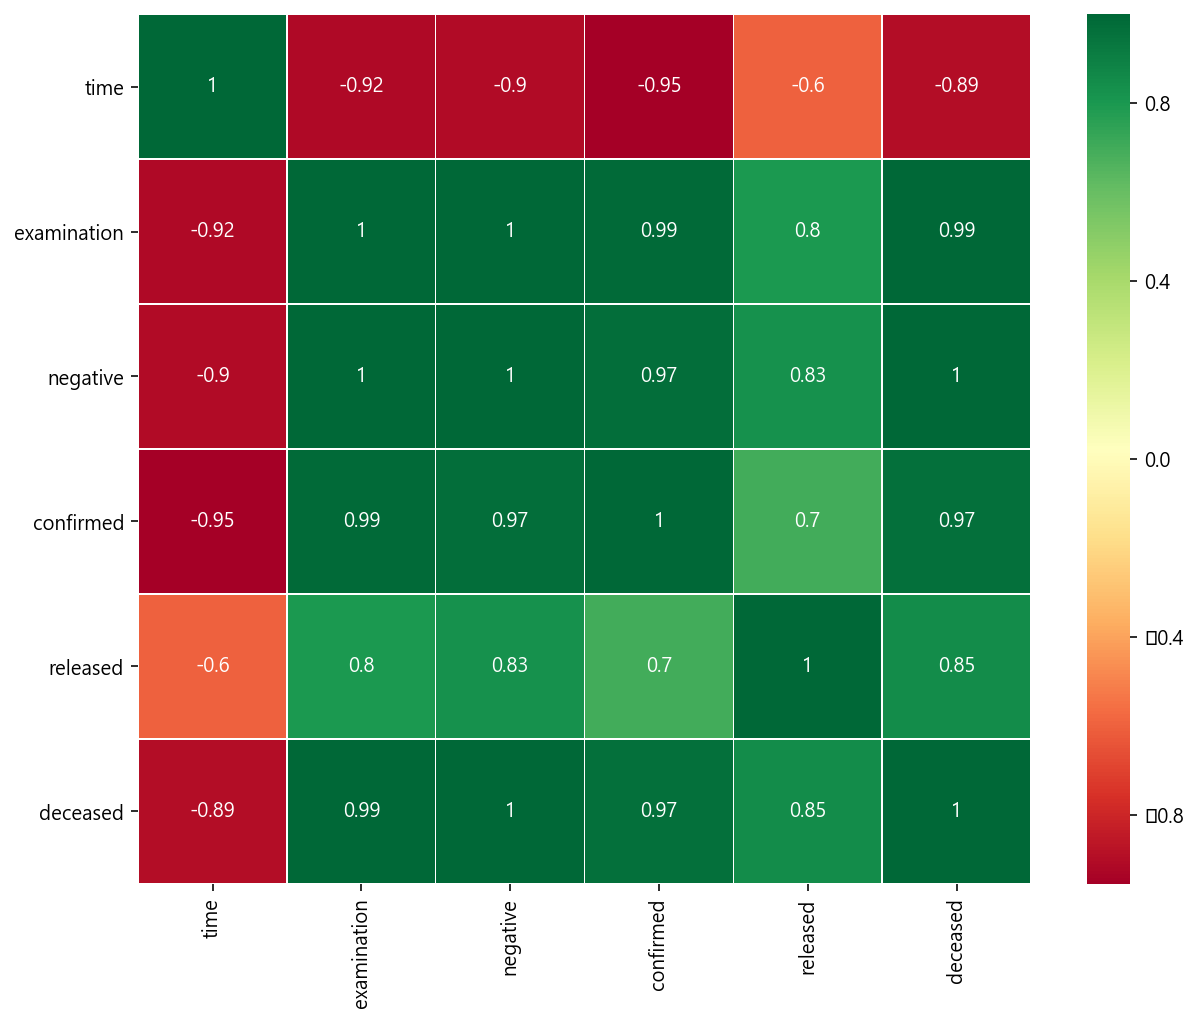

In [17]:
# data.corr() : correlation matrix of data
sns.heatmap(train_korea[["time","examination", 'negative', 'confirmed', 'released', 'deceased']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 위의 산점도를 확인한 결과 time은 제외해야함
- examination = negative + confirmed + (ongoing_test)이므로 negative도 제외하겠음

In [22]:
train_korea.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,examination,confirmed,released,deceased,firm_examination_rate
count,59.000000,59.0,59.0,59.000000,59.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,13050.000000,36.0,128.0,2628.915254,20.898305,86667.825397,2711.428571,282.031746,22.746032,6.204274
std,17.175564,0.0,0.0,3412.903846,29.621576,111662.737369,3483.978175,653.609160,32.333927,17.418416
min,13021.000000,36.0,128.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.317233
25%,13035.500000,36.0,128.0,21.000000,0.000000,660.500000,17.000000,0.500000,0.000000,2.072484
50%,13050.000000,36.0,128.0,104.000000,1.000000,13202.000000,104.000000,16.000000,1.000000,2.879249
75%,13064.500000,36.0,128.0,6340.500000,38.500000,171464.500000,6525.500000,113.000000,43.000000,3.765620
max,13079.000000,36.0,128.0,8652.000000,94.000000,331780.000000,8897.000000,2909.000000,104.000000,100.000000


In [26]:
df = train_korea.iloc[:,8:]
df

,examination,confirmed,released,deceased,firm_examination_rate
0,1,1,0,0,100.000000
1,1,1,0,0,100.000000
2,4,1,0,0,25.000000
3,22,1,0,0,4.545455
4,27,2,0,0,7.407407
...,...,...,...,...,...
58,295647,8413,1540,84,2.845623
59,307024,8565,1947,91,2.789684
60,316664,8652,2233,94,2.732234
61,327509,8799,2612,102,2.686644


https://ssungkang.tistory.com/entry/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-PCA-2-python-%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-PCA-%EC%8B%A4%EC%8A%B5
    
    
df = StandardScaler().fit_transform(df)